# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import memory_profiler as mp
%load_ext memory_profiler

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [2]:
from main import spare_matrix_Abt, square_from_rectan, residual_norm
A, b = spare_matrix_Abt(50,12)


In [3]:
At, bt = square_from_rectan(A,b)
result1 = np.linalg.solve(At,bt)
error1 = residual_norm(A, result1, b)


In [4]:
result2 = np.linalg.lstsq(A,b, rcond=None)[0]
error2 = residual_norm(A, result2, b)

In [5]:
q, r = np.linalg.qr(A)
result3 = sp.linalg.solve_triangular(r, q.T @ b)
error3 = residual_norm(A, result3, b)


In [6]:
U,s,V= np.linalg.svd(A,full_matrices=False)
S=np.diag(s)
result4 =V.T@ np.linalg.solve(S,U.T@b)
error4 = residual_norm(A, result4, b)


In [7]:
def square_time(A,b):
    At, bt = square_from_rectan(A,b)
    result = np.linalg.solve(At,bt)

def qr_time(A,b):
    q, r = np.linalg.qr(A)
    result = sp.linalg.solve_triangular(r, q.T @ b)

def svd_time(A,b):
    S = np.diag(s)
    result =V.T@ np.linalg.solve(S,U.T@b)

In [8]:
print('METODA 1\n')

print('Timing: ')
%timeit -r 30 -n 20 -o square_time
print('Memory usage: ')
%memit square_time
print('\n')
print("Błąd dla metody 1 (z użyciem funkcji solve) wynosi: {}\n".format(error1))

print('\nMETODA 2\n')

print('Timing: ')
%timeit -r 30 -n 20 -o np.linalg.lstsq(A,b, rcond=None)[0]
print('Memory usage: ')
%memit np.linalg.lstsq(A,b, rcond=None)[0]
print('\n')
print("Błąd dla metody 2 (za pomocją lstsq) wynosi: {}\n".format(error2))


print('\nMETODA 3\n')

print('Timing: ')
%timeit -r 30 -n 20 -o qr_time
print('Memory usage: ')
%memit qr_time
print('\n')
print("Błąd dla metody 3 (z użyciem rozkładu QR) wynosi: {}\n".format(error3))


print('\nMETODA 4\n')

print('Timing: ')
%timeit -r 30 -n 20 -o svd_time
print('Memory usage: ')
%memit svd_time
print('\n')
print("Błąd dla metody 4 (z użyciem rozkładu SVD) wynosi: {}\n".format(error3))

METODA 1

Timing: 
20.8 ns ± 3.89 ns per loop (mean ± std. dev. of 30 runs, 20 loops each)
Memory usage: 
peak memory: 97.50 MiB, increment: 0.11 MiB


Błąd dla metody 1 (z użyciem funkcji solve) wynosi: 1.1776522654702097e-07


METODA 2

Timing: 
52.9 µs ± 2.12 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
Memory usage: 
peak memory: 97.59 MiB, increment: 0.00 MiB


Błąd dla metody 2 (za pomocją lstsq) wynosi: 7.999155462107696e-09


METODA 3

Timing: 
18.3 ns ± 4.71 ns per loop (mean ± std. dev. of 30 runs, 20 loops each)
Memory usage: 
peak memory: 97.59 MiB, increment: 0.00 MiB


Błąd dla metody 3 (z użyciem rozkładu QR) wynosi: 7.999154395520692e-09


METODA 4

Timing: 
27.5 ns ± 12.4 ns per loop (mean ± std. dev. of 30 runs, 20 loops each)
Memory usage: 
peak memory: 97.59 MiB, increment: 0.00 MiB


Błąd dla metody 4 (z użyciem rozkładu SVD) wynosi: 7.999154395520692e-09



Najmniej dokładna okazała się metoda pierwsza (błąd aż o 2 rzędy większy), czyli przekształcenie macierzy protokątnej do kwadratowej i dopiero natępnie
wylicznie układu. Jednak metoda ta jest także najmniej czasochłonna. Błąd dla pozostałych metod jest bardzo zblizony,
dla podanych danych utrzymujcy się na poziomie e-9, jednak metody różnią się złożonością czasową. Metoda lstsq spisała
się pod tym względe zdecydowanie najgorzej (czas w mikrosekundach, w porównaniu do nanosekund). Drugą najwolniejszą metodą
okazało się użycie rozkładu QR. Rozkład SVD jest drugą najszybszą metodą.
Złożoność pamięciowa każdej z metod okazała się być taka sama.

Wnioski: Jeśli chcemy rozwiązać układ równań zapisany za pomocą rzadkiej macierzy prostokątnej, najlepiej jest użyć albo
rozkładu QR alb SVD.

***Zadanie 2***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

In [9]:
x1 = np.random.normal(0, 1, (100, 1))
x2 = np.random.normal(0, 1, (100, 1))
one = np.ones((100,1))

eps = np.random.normal(0, 1, (100, 1))
y = 2 + x1 - x2/2 + eps

pred1=[min(x1), max(x1)]
pred2=[min(x2), max(x2)]

xx, yy = np.meshgrid(np.linspace(-2.5,2.5,10), np.linspace(-2.5,2.5,10))

In [10]:
con1 = np.concatenate((one, x1), axis = 1)
con2 = np.concatenate((one, x2), axis = 1)
con3 = np.concatenate((one, x1, x2), axis = 1)
con4 = np.concatenate((one, x2, x2), axis = 1)

q, r = np.linalg.qr(con1)
b1,a1 = sp.linalg.solve_triangular(r, q.T @ y)
y1 = a1 * pred1 + b1

q, r = np.linalg.qr(con2)
b2,a2 = sp.linalg.solve_triangular(r, q.T @ y)
y2 = a2 * pred2 + b2

q, r = np.linalg.qr(con3)
b3,a13,a23 = sp.linalg.solve_triangular(r, q.T @ y)
y3 = a13 * xx+ a23 * yy + b3

q, r = np.linalg.qr(con2)
b4, a4 = sp.linalg.solve_triangular(r, q.T @ y)
y4 = a4 * pred2 + a4 * pred2 + b3


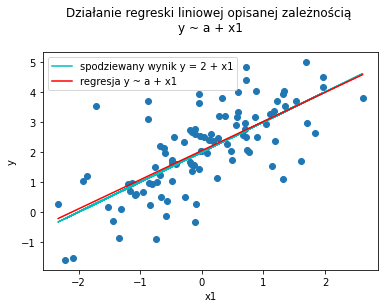

In [11]:
plt.scatter(x1, y)
plt.plot(x1, 2 + x1, color ='c', label = "spodziewany wynik y = 2 + x1")
plt.plot(pred1, y1, color = 'r', label = "regresja y ~ a + x1 ")
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Działanie regreski liniowej opisanej zależnością \ny ~ a + x1\n")
plt.legend()
plt.show()

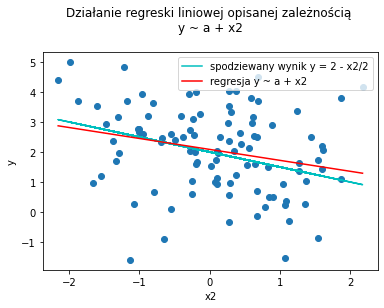

In [12]:
plt.scatter(x2, y)
plt.plot(x2, 2 - x2/2, color ='c', label = "spodziewany wynik y = 2 - x2/2")
plt.plot(pred2, y2, color = 'r', label = "regresja y ~ a + x2 ")
plt.xlabel("x2")
plt.ylabel("y")
plt.title("Działanie regreski liniowej opisanej zależnością \ny ~ a + x2\n")
plt.legend()
plt.show()

C:\Users\Agata\AppData\Local\Temp/ipykernel_15340/1273654717.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


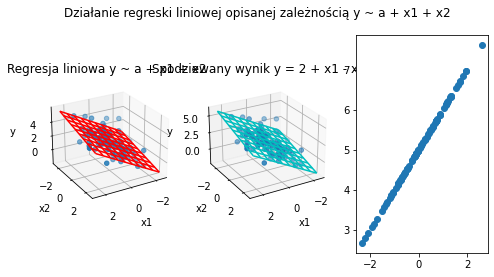

In [13]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Działanie regreski liniowej opisanej zależnością y ~ a + x1 + x2\n\n\n\n")

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(x1,x2,y)
ax.plot_wireframe(xx,yy,y3, color = "r")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.title("Regresja liniowa y ~ a + x1 + x2")

ax.view_init(25,60)

ax = fig.add_subplot(1, 3, 2,projection='3d')
ax.scatter3D(x1,x2,y)
ax.plot_wireframe(xx,yy,2 + xx - yy/2, color = "c")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.title("Spodziewany wynik y = 2 + x1 - x2/2")
ax.view_init(25,60)

fig.show()

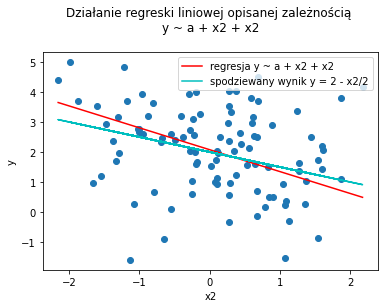

In [14]:
plt.scatter(x2,y)
plt.plot(pred2, y4, color = 'r', label = "regresja y ~ a + x2 + x2  ")
plt.plot(x2, 2 - x2/2, color ='c', label = "spodziewany wynik y = 2 - x2/2")
plt.xlabel("x2")
plt.ylabel("y")
plt.title("Działanie regreski liniowej opisanej zależnością \ny ~ a + x2 + x2\n")
plt.legend()
plt.show()

plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)